# Pittsburgh's Best Neighborhood for Sports
### Group members: Bakhtiyor Alimov, Matthew Lu
#### Submetrics:
1. Quantity
2. Variety
3. Crime
4. Population

Both of us enjoy playing and watching sports, so we thought this would be an interesting way to analyze the many different neighborhoods in our city. We are going to explore four different submetrics that we feel play an important role in deciding what neighborhoods are best to play sports in. After looking through possible datasets to use, we settled on using these 3: 


courts + rinks : [cityCourts.csv](https://data.wprdc.org/dataset/city-of-pittsburgh-courts/resource/a5b71bfa-840c-4c86-8f43-07a9ae854227) 


crime : [public-safety.csv](https://data.wprdc.org/dataset/pgh/resource/204f63f4-296f-4f1d-bbdd-946b183fa5a0)


population : [population.csv](https://data.wprdc.org/dataset/1984-community-profiles-a-descriptive-picture-of-communities-in-allegheny-county/resource/8e2b239e-4a46-49f9-bd13-2566f3c64d28) 

Initially, we though of doing 3 submetrics, but came to the conclusion that using 4, and splitting the work among the two of us would be a better idea. That way, we could do an even amount of work and have an extra submetric of data to present. Let's start with our first sub-metric!

# Sub-metric: Quantity
### By: Bakhtiyor Alimov
The first metric we want to discuss is quantity. In order to determine the best neighborhood for playing sports, we need to see how many total playing fields are available in each neighborhood.


In [2]:
# imports

import pandas as pd
import geopandas as gpd

In [3]:
# let's open the "City Courts" file from Pittsburgh's database

courts = pd.read_csv("cityCourts.csv", index_col = "neighborhood", parse_dates = True)
courts.head(10)

,_id,id,name,type,park,location,surface_material,grandstand,inactive,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
neighborhood,,,,,,,,,,,,,,,,,,
Allegheny Center,1,1592343416,Allegheny Commons Basketball Court 1,Basketball (Full),Allegheny Commons,NaN,NaN,0,f,1,22,42003562700,1,22,1,1-7,40.454443,-80.008104
Allegheny Center,2,1365248699,Allegheny Commons Park Tennis Court 1,Tennis,Allegheny Commons,NaN,Asphalt,0,f,1,22,42003562700,1,22,1,1-7,40.452400,-80.012531
Allegheny Center,3,1757180821,Allegheny Commons Park Tennis Court 2,Tennis,Allegheny Commons,NaN,Asphalt,0,f,1,22,42003562700,1,22,1,1-7,40.452238,-80.012150
Allegheny Center,4,744303307,Allegheny Commons Park Tennis Court 3,Tennis,Allegheny Commons,NaN,Asphalt,0,f,1,22,42003562700,1,22,1,1-7,40.452075,-80.011767
Beechview,5,1157777481,Alton Park Basketball Court 1,Basketball (Half),Alton Park,NaN,Asphalt,0,f,4,19,42003191600,5,19,6,4-28,40.414152,-80.022305
Beechview,6,299909706,Alton Park Basketball Court 2,Basketball (Full),Alton Park,NaN,Asphalt,0,f,4,19,42003191600,5,19,6,4-28,40.414155,-80.022088
Bedford Dwellings,7,912994212,Ammon Park Basketball Court 1,Basketball (Full),Ammon Park,NaN,Asphalt,0,f,6,5,42003050900,3,5,2,2-5,40.449331,-79.977473
Bedford Dwellings,8,1342647628,Ammon Park Basketball Court 2,Basketball (Full),Ammon Park,NaN,Asphalt,0,f,6,5,42003050900,3,5,2,2-5,40.449184,-79.977371
South Side Slopes,9,470473315,Arlington Park Basketball Court 1,Basketball (Full),Arlington Park,NaN,Asphalt,0,f,3,16,42003160800,3,16,3,4-22,40.417990,-79.975053


In [4]:
# now we will display the following:
# name of the neighborhood, and the courts within that neighborhood

newCourts = courts[["name"]]
newCourts.head(15)

,name
neighborhood,
Allegheny Center,Allegheny Commons Basketball Court 1
Allegheny Center,Allegheny Commons Park Tennis Court 1
Allegheny Center,Allegheny Commons Park Tennis Court 2
Allegheny Center,Allegheny Commons Park Tennis Court 3
Beechview,Alton Park Basketball Court 1
Beechview,Alton Park Basketball Court 2
Bedford Dwellings,Ammon Park Basketball Court 1
Bedford Dwellings,Ammon Park Basketball Court 2
South Side Slopes,Arlington Park Basketball Court 1


If we want to use quantity to determine which neghborhood has the best parks for playing sports, it'd be a good idea to filter out those neighborhoods who have a limited number of total courts.

In [5]:
#here, we display the total number of any type of courts that each neighborhood has

amount = newCourts.groupby("neighborhood").count()
amount.head(15)

,name
neighborhood,
Allegheny Center,9
Allentown,1
Banksville,3
Bedford Dwellings,2
Beechview,7
Beltzhoover,9
Bloomfield,5
Bon Air,1
Brighton Heights,2


Now, let's find the average number of courts per neighborhood. Then we will filter out the neighborhoods that contain less than the average amount of courts.

In [6]:
# finding average number of courts per neighborhood

amount["name"].mean()

3.9047619047619047

In [7]:
# filtering out neighborhoods that have below average number of courts
# since the average is about 4, let's look for neighborhoods that have at least 5 courts

dropped = amount[amount['name'] > 4]
dropped

,name
neighborhood,
Allegheny Center,9
Beechview,7
Beltzhoover,9
Bloomfield,5
Brookline,9
East Liberty,6
Elliott,5
Greenfield,5
Hazelwood,10


Now, we have a filtered list of neighborhoods which contain above the average number of courts. If you are looking for there to be availability, the more courts the better. So, this is useful for such a viewpoint. Let's take a look at this data visualized:


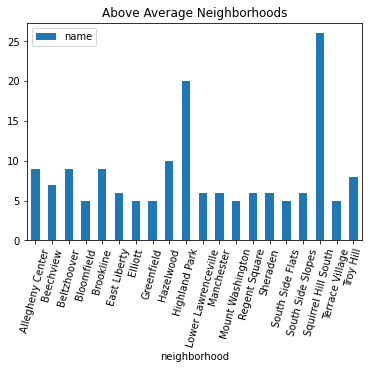

In [8]:
#visualized data

dropped.plot.bar(rot = 75, title = "Above Average Neighborhoods")

# Conclusion for Quantity
#### Looking at the list, we can see the top neighborhoods for quantity of courts:
- Squirrel Hill South: 26 total courts
- Highland Park: 20 total courts
- Hazelwood: 10 total courts

# Sub-Metric Variety
### By: Bakhtiyor Alimov
The next metric we will be covering is variety. We want to dive deeper into the types of courts and rinks available in each neighborhood. For example, the amount of basketball courts specifically, or the amount of tennis courts, etc.

In [9]:
# imports

import pandas as pd
import geopandas as gpd

#### We are going to read in the same dataset; except this time, focus more heavily on the variety and types of courts/rinks.

In [10]:
# reading in csv file

courts2 = pd.read_csv("cityCourts.csv", index_col = "_id", parse_dates = True)
courts2.head(10)


,id,name,type,park,location,surface_material,grandstand,inactive,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
_id,,,,,,,,,,,,,,,,,,
1,1592343416,Allegheny Commons Basketball Court 1,Basketball (Full),Allegheny Commons,NaN,NaN,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.454443,-80.008104
2,1365248699,Allegheny Commons Park Tennis Court 1,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452400,-80.012531
3,1757180821,Allegheny Commons Park Tennis Court 2,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452238,-80.012150
4,744303307,Allegheny Commons Park Tennis Court 3,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452075,-80.011767
5,1157777481,Alton Park Basketball Court 1,Basketball (Half),Alton Park,NaN,Asphalt,0,f,Beechview,4,19,42003191600,5,19,6,4-28,40.414152,-80.022305
6,299909706,Alton Park Basketball Court 2,Basketball (Full),Alton Park,NaN,Asphalt,0,f,Beechview,4,19,42003191600,5,19,6,4-28,40.414155,-80.022088
7,912994212,Ammon Park Basketball Court 1,Basketball (Full),Ammon Park,NaN,Asphalt,0,f,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449331,-79.977473
8,1342647628,Ammon Park Basketball Court 2,Basketball (Full),Ammon Park,NaN,Asphalt,0,f,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449184,-79.977371
9,470473315,Arlington Park Basketball Court 1,Basketball (Full),Arlington Park,NaN,Asphalt,0,f,South Side Slopes,3,16,42003160800,3,16,3,4-22,40.417990,-79.975053


In [11]:
# this simplifies the dataset
# now we only look at the neighborhood name, the park name, and the type of court

newCourts2 = courts2[["neighborhood", "name", "type"]]
newCourts2.head(10)

,neighborhood,name,type
_id,,,
1,Allegheny Center,Allegheny Commons Basketball Court 1,Basketball (Full)
2,Allegheny Center,Allegheny Commons Park Tennis Court 1,Tennis
3,Allegheny Center,Allegheny Commons Park Tennis Court 2,Tennis
4,Allegheny Center,Allegheny Commons Park Tennis Court 3,Tennis
5,Beechview,Alton Park Basketball Court 1,Basketball (Half)
6,Beechview,Alton Park Basketball Court 2,Basketball (Full)
7,Bedford Dwellings,Ammon Park Basketball Court 1,Basketball (Full)
8,Bedford Dwellings,Ammon Park Basketball Court 2,Basketball (Full)
9,South Side Slopes,Arlington Park Basketball Court 1,Basketball (Full)


In [12]:
# finding the total number of all types of courts that exist

types = newCourts2.groupby("type").count()
test = types[["name"]]
test.head(15)

,name
type,
Basketball (Full),88
Basketball (Half),23
Bocce,8
Dek Hockey,5
General Sports,6
Hockey,14
Horseshoe Pit,2
Lawn Bowling,2
Pickleball,12


Here, we can see the amount of total court types that exist in Pittsburgh. Noticeably, there are more basketball and tennis courts that exist. However, this has no correlation to the neighborhoods, which is what we need. So, now we will create a table that displays each neighborhood, and the emount of each type of court it has.

In [13]:
# setting the type of court as a row value
# then displaying the amount of each type of court that each neighborhood has
# (very wordy i know, sorry)

courtCounts = courts2.groupby(['neighborhood', 'type']).size().reset_index(name='Count')
pivotCounts = courtCounts.pivot_table(index='neighborhood', columns='type', values='Count', fill_value=0)
pivotCounts.head(15)

type,Basketball (Full),Basketball (Half),Bocce,Dek Hockey,General Sports,Hockey,Horseshoe Pit,Lawn Bowling,Pickleball,Street Hockey,Tennis,Volleyball
neighborhood,,,,,,,,,,,,
Allegheny Center,1,1,0,0,0,0,0,0,2,0,5,0
Allentown,1,0,0,0,0,0,0,0,0,0,0,0
Banksville,1,0,0,1,0,0,0,0,0,0,1,0
Bedford Dwellings,2,0,0,0,0,0,0,0,0,0,0,0
Beechview,4,2,0,0,0,0,0,0,0,1,0,0
Beltzhoover,4,0,0,0,1,0,0,0,0,0,4,0
Bloomfield,1,0,2,1,0,0,0,0,0,1,0,0
Bon Air,0,0,0,0,0,1,0,0,0,0,0,0
Brighton Heights,1,0,0,1,0,0,0,0,0,0,0,0


Now, we are able to see each neighborhood, and the amount of any type of court that it has. Very nice. Next, let's look at which neighborhood has the most of each kind of court.

In [14]:
# declare variables which hold best nieghborhood for certain sport:

bestBasketball = pivotCounts['Basketball (Full)'].idxmax()
bestBocce = pivotCounts['Bocce'].idxmax()
bestDekHockey = pivotCounts['Dek Hockey'].idxmax()
bestGeneralSports = pivotCounts['General Sports'].idxmax()
bestIceHockey = pivotCounts['Hockey'].idxmax()
bestHorseshoe = pivotCounts['Horseshoe Pit'].idxmax()
bestLawnBowling = pivotCounts['Lawn Bowling'].idxmax()
bestPickleball = pivotCounts['Pickleball'].idxmax()
bestStreetHockey = pivotCounts['Street Hockey'].idxmax()
bestTennis = pivotCounts['Tennis'].idxmax()

print(bestBasketball)
print(bestBocce)
print(bestDekHockey)
print(bestGeneralSports)
print(bestIceHockey)
print(bestHorseshoe)
print(bestLawnBowling)
print(bestPickleball)
print(bestStreetHockey)
print(bestTennis)

Hazelwood
Morningside
Banksville
Beltzhoover
Hazelwood
New Homestead
Point Breeze
Squirrel Hill South
Beechview
Squirrel Hill South


### Nice! Now let's clean that up with some print statements and make it look nice.

In [15]:
print("\nthe best neighborhood for Dek Hockey is: " + bestDekHockey)
print("\nthe best neighborhood for Street Hockey is: " + bestStreetHockey)
print("\nthe best neighborhood for General Sports is: " + bestGeneralSports)
print("\nthe best neighborhood for Basketball is: " + bestBasketball)
print("\nthe best neighborhood for Ice Hockey is: " + bestIceHockey)
print("\nthe best neighborhood for Bocce is: " + bestBocce)
print("\nthe best neighborhood for Horseshoe Pit is: " + bestHorseshoe)
print("\nthe best neighborhood for Lawn Bowling is: " + bestLawnBowling)
print("\nthe best neighborhood for Pickleball is: " + bestPickleball)
print("\nthe best neighborhood for Tennis is: " + bestTennis)


the best neighborhood for Dek Hockey is: Banksville

the best neighborhood for Street Hockey is: Beechview

the best neighborhood for General Sports is: Beltzhoover

the best neighborhood for Basketball is: Hazelwood

the best neighborhood for Ice Hockey is: Hazelwood

the best neighborhood for Bocce is: Morningside

the best neighborhood for Horseshoe Pit is: New Homestead

the best neighborhood for Lawn Bowling is: Point Breeze

the best neighborhood for Pickleball is: Squirrel Hill South

the best neighborhood for Tennis is: Squirrel Hill South


# Conclusion for Variety
Now, looking at this data, we can draw conclusions on which neighborhood is best for playing a variety of sports. Both **Hazelwood** and **Squirrel Hill South** have the highest amount of **two** different court types. Hazelwood has the most amount of basketball courts *and* ice hockey rinks, while Squirrel Hill South has the highest number of tennis courts *and* pickleball courts.

# Sub-Metric: Crime
### By: Matthew Lu
The more safe the neighborhood, the more safe the public parks with the facilities will be. This metric will analyze a crime dataset to determine the safest neighborhood.

In [16]:
import pandas as pd

In [17]:
#importing data
crime = pd.read_csv("public-safety.csv")

#displaying data!
crime.head(5)

,Neighborhood,Sector #,Population (2010),#Part 1 (Major Crime) Reports (2010),#Part 2 Reports (2010),#Other Police Reports (2010),Part 1 Crime per 100 Persons (2010),Part 2 Crime per 100 Persons (2010),#Murder (2010),#Rape (2010),#Robbery (2010),#Agr. Assault (2010),#Burglary (2010),#Auto Theft (2010),#Drug Violations (2010)
0,Allegheny Center,3,933,71,141,46,7.6,15.1,0,2,9,5,8,5,31
1,Allegheny West,3,462,38,49,31,8.2,10.6,1,0,4,6,6,4,12
2,Allentown,6,"2,500",159,252,160,6.4,10.1,0,2,15,23,48,11,66
3,Arlington,7,"1,869",50,84,48,2.7,4.5,0,1,8,5,15,7,9
4,Arlington Heights,7,244,19,37,24,7.8,15.2,0,0,4,5,5,3,7


In [18]:
#adds up total crime for each neighboorhood and puts it into a series (excludes reports)
total_crime = crime["#Murder (2010)"] + crime["#Rape (2010)"] + crime["#Robbery (2010)"] + crime["#Agr. Assault (2010)"] + crime["#Burglary (2010)"] + crime["#Auto Theft (2010)"] + crime["#Drug Violations (2010)"]
print(total_crime)

0      60
1      33
2     165
3      45
4      24
     ... 
85     86
86     46
87     54
88     32
89     26
Length: 90, dtype: int64


In [19]:
#population is a string here, not an int -> need to convert
print(crime["Population (2010)"])

0       933
1       462
2     2,500
3     1,869
4       244
      ...  
85    2,669
86      254
87    2,604
88    3,066
89    1,369
Name: Population (2010), Length: 90, dtype: object


In [20]:
#creates a Series with population in int form (notice no ',' in numbers)
population = crime["Population (2010)"].str.replace(',', '')
population = population.astype(int)
print(population)

0      933
1      462
2     2500
3     1869
4      244
      ... 
85    2669
86     254
87    2604
88    3066
89    1369
Name: Population (2010), Length: 90, dtype: int64


In [21]:
#ratio for determing most dangerous/safe neighboordhood 
cpp = (total_crime / population * 100)

#adds ratio as a column to main dataset
crime["Crime/Population (%)"] = cpp
crime.head(10)

,Neighborhood,Sector #,Population (2010),#Part 1 (Major Crime) Reports (2010),#Part 2 Reports (2010),#Other Police Reports (2010),Part 1 Crime per 100 Persons (2010),Part 2 Crime per 100 Persons (2010),#Murder (2010),#Rape (2010),#Robbery (2010),#Agr. Assault (2010),#Burglary (2010),#Auto Theft (2010),#Drug Violations (2010),Crime/Population (%)
0,Allegheny Center,3,933,71,141,46,7.6,15.1,0,2,9,5,8,5,31,6.430868
1,Allegheny West,3,462,38,49,31,8.2,10.6,1,0,4,6,6,4,12,7.142857
2,Allentown,6,"2,500",159,252,160,6.4,10.1,0,2,15,23,48,11,66,6.600000
3,Arlington,7,"1,869",50,84,48,2.7,4.5,0,1,8,5,15,7,9,2.407705
4,Arlington Heights,7,244,19,37,24,7.8,15.2,0,0,4,5,5,3,7,9.836066
5,Banksville,5,"4,144",62,81,61,1.5,2.0,0,0,2,5,9,5,7,0.675676
6,Bedford Dwellings,15,"1,202",42,80,38,3.5,6.7,0,0,7,8,8,2,25,4.159734
7,Beechview,5,"7,974",193,303,148,2.4,3.8,1,1,7,9,47,37,29,1.642839
8,Beltzhoover,6,"1,925",83,131,85,4.3,6.8,1,0,6,10,28,8,38,4.727273
9,Bloomfield,12,"8,442",453,371,296,5.4,4.4,0,3,45,20,70,36,42,2.558635


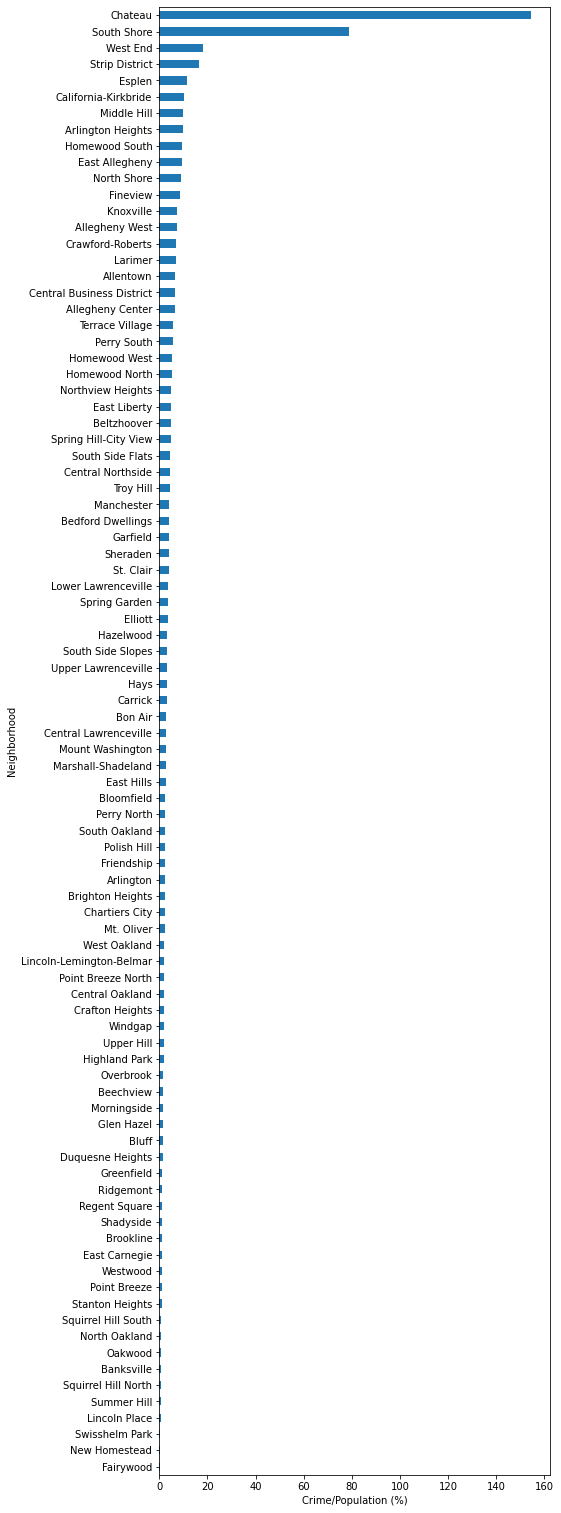

In [22]:
#display table
filterds = crime.filter(["Neighborhood", "Crime/Population (%)"]).sort_values(by=["Crime/Population (%)"], ascending=True)
graph = filterds.plot.barh(x="Neighborhood", y= "Crime/Population (%)", figsize=(7,crime.shape[0] * 0.3), legend=None)
graph.set_xlabel("Crime/Population (%)")
display(graph)

Based on our ratio of Crime/Population, the 5 safest neighborhoods to play sports in would be:
- Fairywood
- New Homestead
- Swisshelm Park
- Lincoln Place
- Summer Hill

In conclusion, the best neighborhood to play sports in based off of crime alone would be **Fairywood**.

# Sub-Metric: Population
### By Matthew Lu

Sports are no fun by yourself. The more people in the neighborhood, the more people to play sports with. This metric will analyze a population dataset and determine the neighborhood with the most people. 

In [23]:
import pandas as pd
import geopandas
%matplotlib inline

In [24]:
#importing data
population = pd.read_csv("population.csv")

#remove missing population value for certain community (Coraopolis)
population.drop(
    labels = [46],
    axis = 0,
    inplace = True
)

#removing irrelvant "communities" for example -> "Allegheny County"
population.drop(
    labels = [2, 149, 150],
    axis = 0,
    inplace = True
)

#displaying data!
population.head(5)

,Community,pop_total,%race_white,%race_black,%race_other,%age_0-4,%age_5-18,%age_19-44,%age_45-64,%age_65+,%fem_married,%fem_single,%fem_sep,%fem_widowed,%fem_under15_married,%male_married,%male_single,%male_sep,%male_widowed,%male_under15_married
0,Aleppo,"1,134",93.0,6.0,1.0,5.0,19.0,39.0,30.0,7.0,56.0,18.0,5.0,5.0,16.0,55.0,18.0,6.0,2.0,19.0
1,Allegheny Center,"1,554",62.0,35.0,3.0,3.0,12.0,45.0,24.0,16.0,21.0,46.0,11.0,12.0,9.0,27.0,43.0,16.0,4.0,10.0
3,Allegheny West,845,89.0,10.0,1.0,3.0,7.0,43.0,27.0,19.0,26.0,28.0,15.0,22.0,8.0,20.0,48.0,22.0,4.0,6.0
4,Allentown,"4,043",97.0,3.0,0.0,8.0,20.0,34.0,23.0,15.0,37.0,19.0,9.0,15.0,19.0,41.0,26.0,6.0,4.0,24.0
5,Arlington,"2,764",96.0,3.0,1.0,7.0,21.0,33.0,24.0,15.0,41.0,20.0,6.0,13.0,19.0,46.0,24.0,4.0,3.0,22.0


In [25]:
#creates a Series with population in int form (notice no ',' in numbers)
int_population = population["pop_total"].str.replace(',', '')
int_population = int_population.astype(int)
int_population.head(5)

0    1134
1    1554
3     845
4    4043
5    2764
Name: pop_total, dtype: int64

In [26]:
#add to main dataset
population["Total Population"] = int_population
population.head(5)

,Community,pop_total,%race_white,%race_black,%race_other,%age_0-4,%age_5-18,%age_19-44,%age_45-64,%age_65+,...,%fem_single,%fem_sep,%fem_widowed,%fem_under15_married,%male_married,%male_single,%male_sep,%male_widowed,%male_under15_married,Total Population
0,Aleppo,"1,134",93.0,6.0,1.0,5.0,19.0,39.0,30.0,7.0,...,18.0,5.0,5.0,16.0,55.0,18.0,6.0,2.0,19.0,1134
1,Allegheny Center,"1,554",62.0,35.0,3.0,3.0,12.0,45.0,24.0,16.0,...,46.0,11.0,12.0,9.0,27.0,43.0,16.0,4.0,10.0,1554
3,Allegheny West,845,89.0,10.0,1.0,3.0,7.0,43.0,27.0,19.0,...,28.0,15.0,22.0,8.0,20.0,48.0,22.0,4.0,6.0,845
4,Allentown,"4,043",97.0,3.0,0.0,8.0,20.0,34.0,23.0,15.0,...,19.0,9.0,15.0,19.0,41.0,26.0,6.0,4.0,24.0,4043
5,Arlington,"2,764",96.0,3.0,1.0,7.0,21.0,33.0,24.0,15.0,...,20.0,6.0,13.0,19.0,46.0,24.0,4.0,3.0,22.0,2764


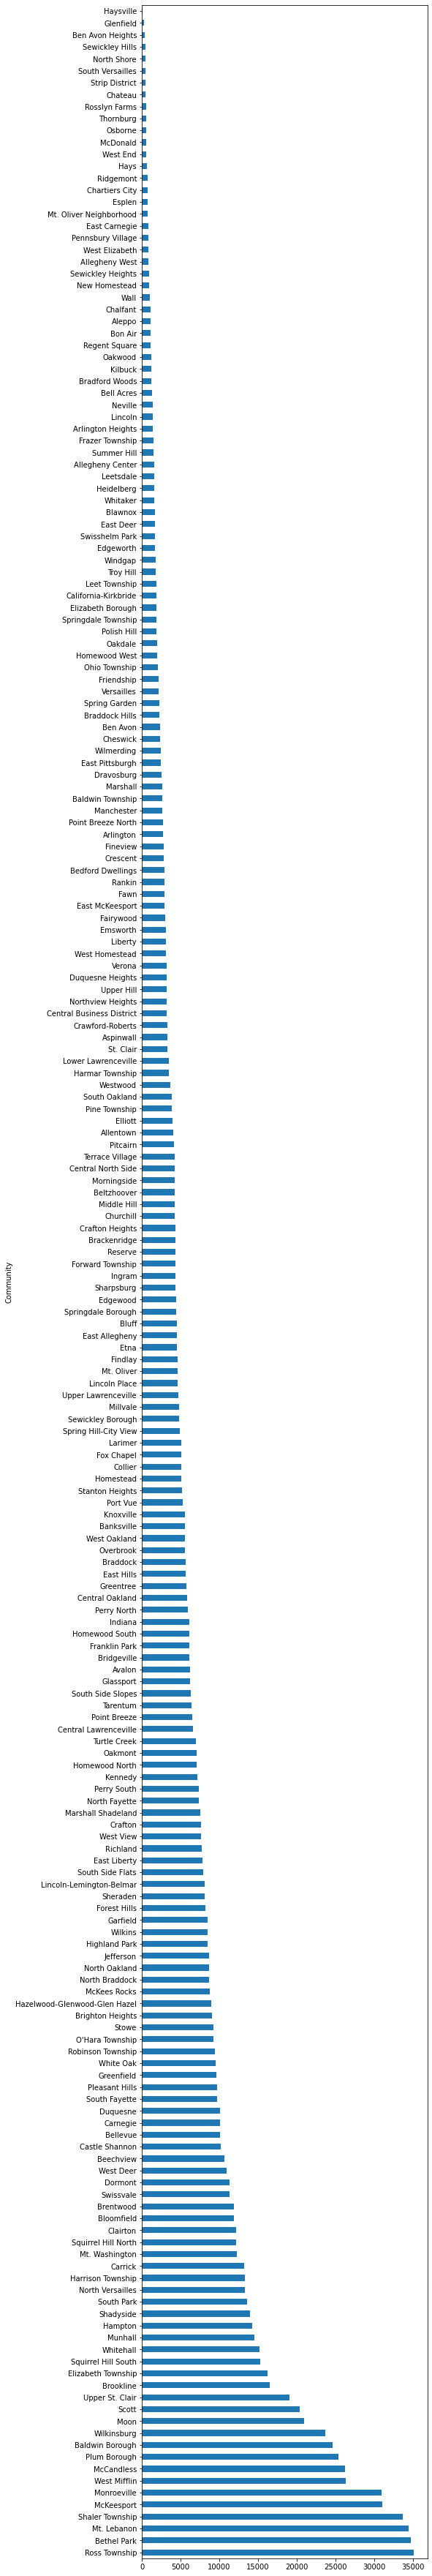

In [27]:
filtered = population.filter(["Community", "Total Population"]).sort_values(by=["Total Population"], ascending=False)
graph = filtered.plot.barh(x="Community", y= "Total Population", figsize=(7,population.shape[0] * 0.3), legend=None)
display(graph)

You can see the most populated areas -> Going to show a map representation as well 

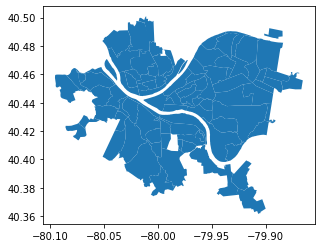

In [28]:
#reads in neighborhood map
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") 
neighborhoods.plot()

In [29]:
# filter to important info
num_population = population.groupby("Community").sum()['Total Population']
num_population.sort_values(ascending=False)

Community
Ross Township       35102
Bethel Park         34755
Mt. Lebanon         34414
Shaler Township     33694
McKeesport          31012
                    ...  
North Shore           424
Sewickley Hills       419
Ben Avon Heights      398
Glenfield             246
Haysville             117
Name: Total Population, Length: 214, dtype: int64

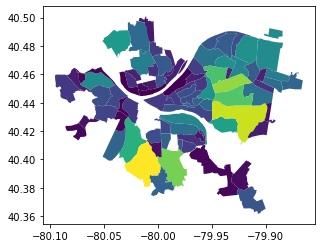

In [30]:
# do the merge
population_map = neighborhoods.merge(num_population, how='left', left_on='hood', right_on='Community')

#plot
population_map.plot(column='Total Population')

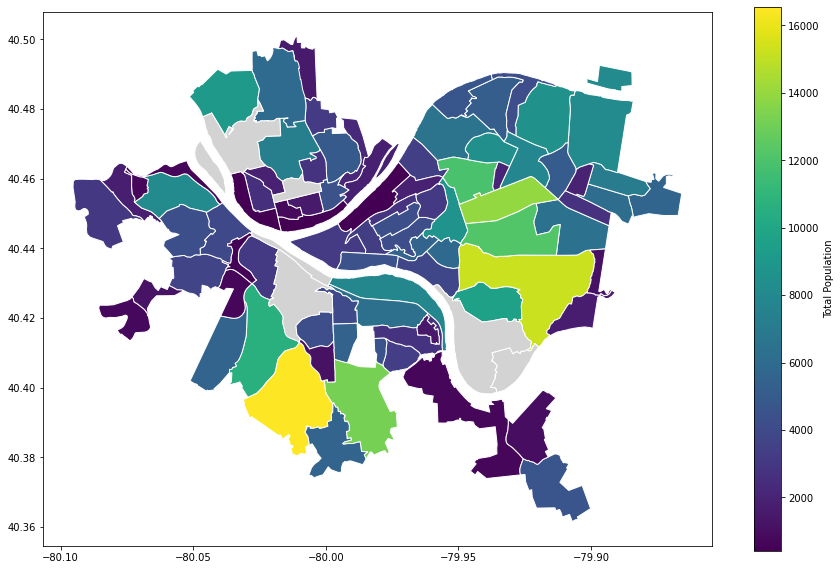

In [31]:
#final geopandas plot
population_map.plot(column='Total Population',
               edgecolor="white",        
               legend=True,             
               legend_kwds={'label': "Total Population"}, 
               figsize=(15, 10),         
               missing_kwds={"color": "lightgrey"} 
               )

Based on the dataset, the 5 most populated neighborhoods to play sports in would be:
- Ross Township
- Bethel Park
- Mt. Lebo
- Shaler
- McKeesport

In conclusion, the best neighborhood to play sports in based off of population alone would be **Ross Township**.

# Group Conclusion:

Based off of our data analysis, we feel it is appropriate to name **Squirrel Hill** as the best neighborhood to play sports in. It ranks the highest in terms of total courts + rinks available; it ranks first in variety, as it contains the highest number of pickleball *and* tennis courts; it ranks 6th in terms lowest crime rate (safety); and is the 17th most populated neighborhood in Pittsburgh, out of 200+ neighborhoods. It is hard to argue with the overall ranking of Squirell Hill as the best to play sports in. 

## Individual Conclusions:
Bakhtiyor: My personal favorite neighborhood in Pittsburgh is Mt. Lebanon. I've lived there for a while, and it is a nice area with plenty of sports facilities, parks, etc. I've spent a lot of my time there at the basketball courts during the summer playing pickup basketball, I've played tennis there with my family, and I've had countless hockey practices and games at both of their main ice hockey rinks. From my own experience, I was expecting Mt. Lebanon to be a prominent neighborhood throughout this entire analysis, but I was surprised to see that there were other neighborhoods that were more populated with courts and rinks. In comparision, Squirrel Hill is safer, and contains more courts and rinks for people to play on.

Matthew: Personally, I agree with Squirrel Hill being the best neighborhood to play sports in. Schenley Park in particular has a lot of different fields and courses to use, which aligns with our analysis. I also go there personally to play ultimate frisbee a lot so Squirrel Hill is definitely my favorite neighborhood to play sports in.